In [2]:
import pandas as pd



In [3]:
intensity_df=pd.read_csv('energy-intensity-of-economies.csv')

In [4]:
print(intensity_df.shape)

(3950, 4)


In [5]:
renewable_share_df=pd.read_csv('share-of-final-energy-consumption-from-renewable-sources.csv')

In [6]:
print(renewable_share_df.shape)

(4798, 5)


In [7]:
print(renewable_share_df.columns)
print(intensity_df.columns)

Index(['Country', 'Code', 'Year',
       'Renewable energy share in the total final energy consumption (%)',
       'Access'],
      dtype='object')
Index(['Entity', 'Code', 'Year',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'],
      dtype='object')


In [8]:
intensity_renew_share_df=pd.merge(renewable_share_df, intensity_df, on=['Code', 'Year'])

In [120]:
intensity_renew_share_df.head(3)

,Country,Code,Year,Renewable energy share in the total final energy consumption (%),Access,Entity,Energy intensity level of primary energy (MJ/$2017 PPP GDP)
0,Afghanistan,AFG,2000,44.99,1.613591,Afghanistan,1.64
1,Afghanistan,AFG,2001,45.60,4.074574,Afghanistan,1.74
2,Afghanistan,AFG,2002,37.83,9.409158,Afghanistan,1.40


In [121]:
# Check if the two columns have the same country name in all rows for data integrirty
if intensity_renew_share_df['Country'].equals(intensity_renew_share_df['Entity']):
    print('Both columns have the same value in all rows.')
else:
    print('Both columns do not have the same value in all rows.')

Both columns have the same value in all rows.


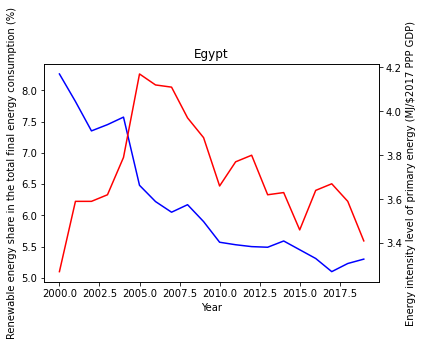

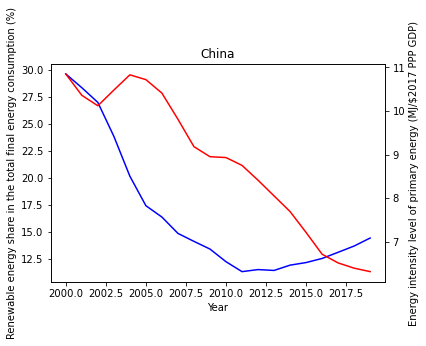

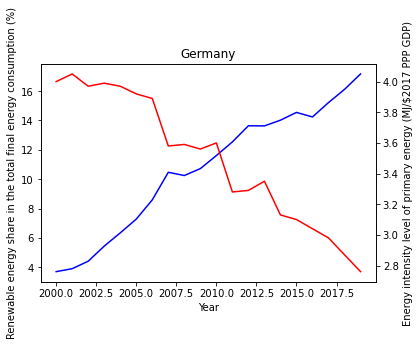

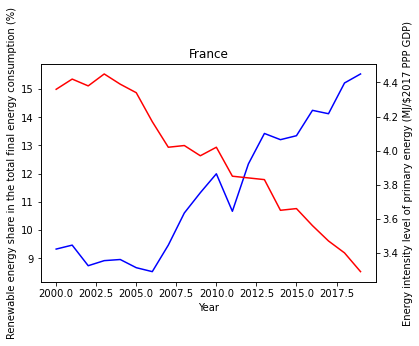

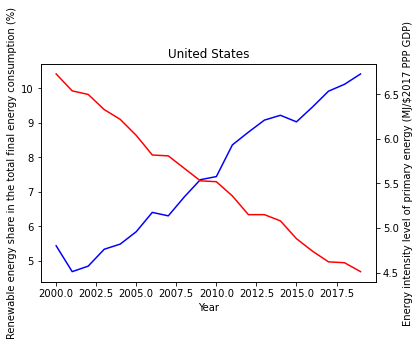

In [122]:
import matplotlib.pyplot as plt

# List of countries for which to create line charts
countries = ['Egypt', 'China', 'Germany','France','United States']

# Create a line chart for each country
for country in countries:
    # Select the data for the current country
    country_data = intensity_renew_share_df[intensity_renew_share_df['Country'] == country]
    
    # Create a figure and axis objects
    fig, ax1 = plt.subplots()
    
    # Create a second y-axis
    ax2 = ax1.twinx()
    
    # Plot the first column on the left y-axis
    ax1.plot(country_data['Year'], country_data['Renewable energy share in the total final energy consumption (%)'], color='blue')
    ax1.set_ylabel('Renewable energy share in the total final energy consumption (%)')
    
    # Plot the second column on the right y-axis
    ax2.plot(country_data['Year'], country_data['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'], color='red')
    ax2.set_ylabel('Energy intensity level of primary energy (MJ/$2017 PPP GDP)')
    
    # Set the x-axis label and title
    ax1.set_xlabel('Year')
    ax1.set_title(country)
    
    
    # Show the plot
    plt.show()

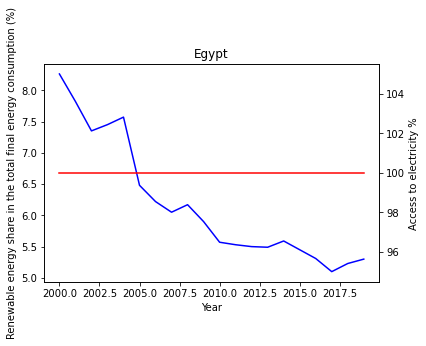

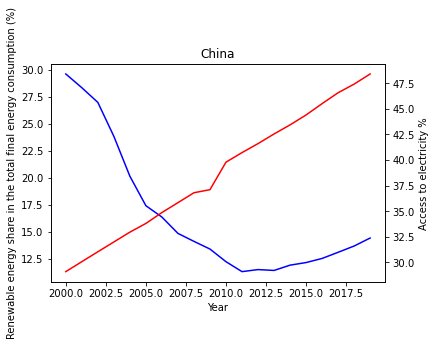

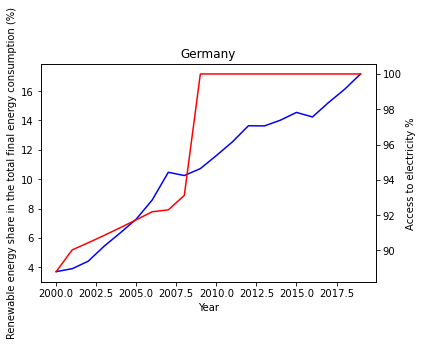

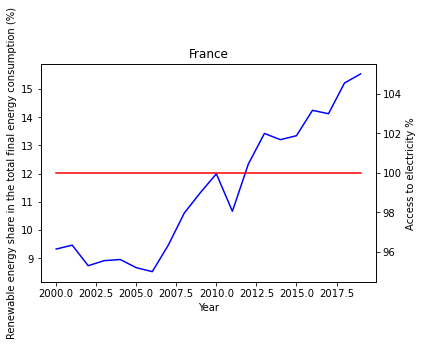

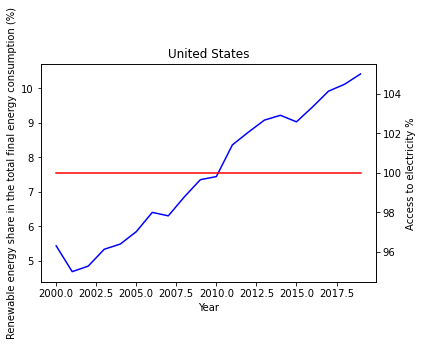

In [123]:
# List of countries for which to create line charts
countries = ['Egypt', 'China', 'Germany','France','United States']

# Create a line chart for each country
for country in countries:
    # Select the data for the current country
    country_data = intensity_renew_share_df[intensity_renew_share_df['Country'] == country]
    
    # Create a figure and axis objects
    fig, ax1 = plt.subplots()
    
    # Create a second y-axis
    ax2 = ax1.twinx()
    
    # Plot the first column on the left y-axis
    ax1.plot(country_data['Year'], country_data['Renewable energy share in the total final energy consumption (%)'], color='blue')
    ax1.set_ylabel('Renewable energy share in the total final energy consumption (%)')
    
    # Plot the second column on the right y-axis
    ax2.plot(country_data['Year'], country_data['Access'], color='red')
    ax2.set_ylabel('Access to electricity %')
    
    # Set the x-axis label and title
    ax1.set_xlabel('Year')
    ax1.set_title(country)
    
    
    # Show the plot
    plt.show()

In [124]:
from sklearn.svm import SVR
# Filter the data for the year range 2000-2020
filtered_data = intensity_renew_share_df[(intensity_renew_share_df['Year'] >= 2000) & (intensity_renew_share_df['Year'] <= 2018)]

# Group the data by country
grouped_data = filtered_data.groupby('Country')

# Create an empty DataFrame to store the predictions
predictions_2019_SVR = pd.DataFrame(columns=['Country', 'Predicted_2019_SVR'])

# Iterate over each country group
for country, group in grouped_data:
    # Prepare the data for SVR
    X = group[['Year']].values
    y = group[['Renewable energy share in the total final energy consumption (%)']]
    weight=group[['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']].values.ravel()
    # Create and fit the SVR model
    model = SVR()
    model.fit(X, y.values.ravel(),sample_weight=weight)

    # Predict the renewable energy share for 2019
    predicted_2019_SVR = model.predict([[2019]])

    # Add the country and prediction to the DataFrame
    predictions_2019_SVR = predictions_2019_SVR.append({'Country': country, 'Predicted_2019_SVR': predicted_2019_SVR[0]}, ignore_index=True)

In [125]:
predictions_2019_SVR.head(5)

,Country,Predicted_2019_SVR
0,Afghanistan,20.294052
1,Algeria,0.224394
2,Angola,57.966766
3,Antigua and Barbuda,0.854093
4,Argentina,10.613152


In [126]:
# Calculate errors in SVR model
data_2019 = intensity_renew_share_df[intensity_renew_share_df['Year'] == 2019]

# Calculate the error for each country
errors = []
for country in data_2019['Country'].unique():
    # Get the true value and predicted value for the current country
    true_value = data_2019.loc[(data_2019['Country'] == country), 'Renewable energy share in the total final energy consumption (%)'].values[0]
    predicted_value = predictions_2019_SVR.loc[(predictions_2019_SVR['Country'] == country), 'Predicted_2019_SVR'].values[0]

    # Calculate the error using a mathematical formula
    if true_value == 0:
        error = 0
    else:
        error = abs(true_value - predicted_value) / true_value
        # Append the error to the list of errors
        errors.append(error)
        
    # Print the error for the current country
    print(f'Error for {country} in 2019: {error:.2%}')

# Calculate the average error for all countries
print(f'Number of countries calculated:{len(errors)}')
print(f'Total countries: {len(data_2019)}')
avg_error = sum(errors) / len(errors)
print(f'Average Error for all countries in 2019 (SVR): {avg_error:.2%}')

Error for Afghanistan in 2019: 9.64%
Error for Algeria in 2019: 40.25%
Error for Angola in 2019: 5.99%
Error for Antigua and Barbuda in 2019: 6.14%
Error for Argentina in 2019: 1.18%
Error for Armenia in 2019: 5.76%
Error for Aruba in 2019: 18.20%
Error for Australia in 2019: 6.02%
Error for Austria in 2019: 2.14%
Error for Azerbaijan in 2019: 29.19%
Error for Bahamas in 2019: 8.20%
Error for Bahrain in 2019: 0.00%
Error for Bangladesh in 2019: 46.79%
Error for Barbados in 2019: 56.15%
Error for Belarus in 2019: 4.25%
Error for Belgium in 2019: 10.77%
Error for Belize in 2019: 18.77%
Error for Benin in 2019: 3.14%
Error for Bermuda in 2019: 8.77%
Error for Bhutan in 2019: 0.83%
Error for Bolivia in 2019: 5.17%
Error for Bosnia and Herzegovina in 2019: 36.21%
Error for Botswana in 2019: 5.89%
Error for Brazil in 2019: 1.42%
Error for Brunei in 2019: 0.00%
Error for Bulgaria in 2019: 17.14%
Error for Burkina Faso in 2019: 10.42%
Error for Burundi in 2019: 2.27%
Error for Cambodia in 2019

In [127]:
from sklearn.linear_model import LinearRegression

# Create an empty DataFrame to store the predictions
predictions_2019_Linear = pd.DataFrame(columns=['Country', 'Predicted_2019_Linear'])

# Iterate over each country group
for country, group in grouped_data:
    # Prepare the data for Linear regression
    X = group[['Year']].values
    y = group[['Renewable energy share in the total final energy consumption (%)']]
    weight=group[['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']].values.ravel()
    # Create and fit the Linear model
    model = LinearRegression()
    model.fit(X, y.values.ravel(),sample_weight=weight)

    # Predict the renewable energy share for 2030
    predicted_2019_Linear = model.predict([[2019]])

    # Add the country and prediction to the DataFrame
    predictions_2019_Linear = predictions_2019_Linear.append({'Country': country, 'Predicted_2019_Linear': predicted_2019_Linear[0]}, ignore_index=True)
    
    predictions_2019_Linear.head(5)

# Calculate the error for each country
errors_Linear = []
for country in data_2019['Country'].unique():
    # Get the true value and predicted value for the current country
    true_value = data_2019.loc[(data_2019['Country'] == country), 'Renewable energy share in the total final energy consumption (%)'].values[0]
    predicted_value = predictions_2019_Linear.loc[(predictions_2019_Linear['Country'] == country), 'Predicted_2019_Linear'].values[0]

    # Calculate the error using a mathematical formula
    if true_value == 0:
        error = 0
    else:
        error = abs(true_value - predicted_value) / true_value
        # Append the error to the list of errors
        errors_Linear.append(error)
        
    # Print the error for the current country
    print(f'Error for {country} in 2019: {error:.2%}')

# Calculate the average error for all countries
print(f'Number of countries calculated:{len(errors_Linear)}')
print(f'Total countries: {len(data_2019)}')
avg_error_Linear = sum(errors_Linear) / len(errors_Linear)
print(f'Average Error for all countries in 2019 (Linear regression): {avg_error_Linear:.2%}')

Error for Afghanistan in 2019: 50.59%
Error for Algeria in 2019: 78.15%
Error for Angola in 2019: 18.13%
Error for Antigua and Barbuda in 2019: 40.25%
Error for Argentina in 2019: 16.17%
Error for Armenia in 2019: 1.69%
Error for Aruba in 2019: 7.03%
Error for Australia in 2019: 8.14%
Error for Austria in 2019: 10.23%
Error for Azerbaijan in 2019: 69.63%
Error for Bahamas in 2019: 38.98%
Error for Bahrain in 2019: 0.00%
Error for Bangladesh in 2019: 2.88%
Error for Barbados in 2019: 50.15%
Error for Belarus in 2019: 3.97%
Error for Belgium in 2019: 8.53%
Error for Belize in 2019: 31.42%
Error for Benin in 2019: 9.91%
Error for Bermuda in 2019: 8.83%
Error for Bhutan in 2019: 2.91%
Error for Bolivia in 2019: 58.08%
Error for Bosnia and Herzegovina in 2019: 37.37%
Error for Botswana in 2019: 11.79%
Error for Brazil in 2019: 4.32%
Error for Brunei in 2019: 30.01%
Error for Bulgaria in 2019: 1.78%
Error for Burkina Faso in 2019: 8.96%
Error for Burundi in 2019: 4.52%
Error for Cambodia in 

In [128]:
predictions_2019_Linear.head(5)

,Country,Predicted_2019_Linear
0,Afghanistan,9.145140
1,Algeria,0.034963
2,Angola,44.774464
3,Antigua and Barbuda,0.543688
4,Argentina,9.002968


In [129]:
predictions_2019_SVR.head(5)

,Country,Predicted_2019_SVR
0,Afghanistan,20.294052
1,Algeria,0.224394
2,Angola,57.966766
3,Antigua and Barbuda,0.854093
4,Argentina,10.613152


In [130]:
# Create an empty DataFrame to store the predictions till 2030
Predicted_Share_2030 = pd.DataFrame(columns=['Country', 'Year', 'Predicted_Share'])

# Iterate over each country group
for country, group in grouped_data:
    # Prepare the data for linear regression
    X = group[['Year']].values
    y = group[['Renewable energy share in the total final energy consumption (%)']].values.ravel()
    weight=group[['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']].values.ravel()
    # Create and fit the SVR model
    model = SVR()
    model.fit(X, y, sample_weight=weight)

    # Predict the renewable energy share for each year from 2020 to 2030
    years = range(2020, 2031)
    predictions_2030 = model.predict([[year] for year in years])

    # Add the country, year, and prediction to the DataFrame
    country_predictions = pd.DataFrame({
        'Country': [country] * len(years),
        'Year': years,
        'Predicted_Share': predictions_2030.flatten()
    })
    Predicted_Share_2030 = Predicted_Share_2030.append(country_predictions, ignore_index=True)

In [131]:
Predicted_Share_2030.head(50)

,Country,Year,Predicted_Share
0,Afghanistan,2020,20.768162
1,Afghanistan,2021,21.251599
2,Afghanistan,2022,21.728348
3,Afghanistan,2023,22.168679
4,Afghanistan,2024,22.544375
5,Afghanistan,2025,22.839306
6,Afghanistan,2026,23.052366
7,Afghanistan,2027,23.194239
8,Afghanistan,2028,23.281494
9,Afghanistan,2029,23.331154


In [132]:
# Save the predictions of SVR to a CSV file
Predicted_Share_2030.to_csv('predicted_share_2030_SVR.csv', index=False)

In [133]:
# Select data for year 2020 and year 2030
data_2020 = Predicted_Share_2030[Predicted_Share_2030['Year'] == 2020]
data_2030 = Predicted_Share_2030[Predicted_Share_2030['Year'] == 2030]

# Merge the data for year 2020 and year 2030
merged = pd.merge(data_2020, data_2030, on='Country', suffixes=('_2020', '_2030'))

# Calculate the difference in predicted share between year 2020 and year 2030
merged['difference'] = merged['Predicted_Share_2030'] - merged['Predicted_Share_2020']

# Filter out rows with a difference of 0
filtered = merged[merged['difference'] != 0]

# Find the country with the maximum and minimum difference
max_country = filtered.loc[filtered['difference'].idxmax(), 'Country']
min_country = filtered.loc[filtered['difference'].idxmin(), 'Country']

# Print the results
print(f'The country with the maximum difference is {max_country} ({filtered.loc[filtered["Country"]==max_country, "difference"].iloc[0]}%)')
print(f'The country with the minimum difference is {min_country} ({filtered.loc[filtered["Country"]==min_country, "difference"].iloc[0]}%)')

The country with the maximum difference is Laos (10.952262697194229%)
The country with the minimum difference is Iceland (-8.691527780610329%)


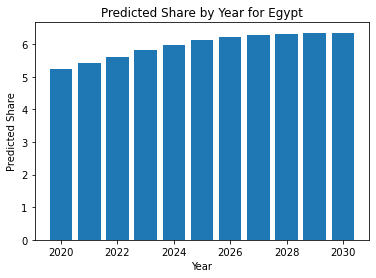

In [134]:

# Filter data for Egypt
egypt_data = Predicted_Share_2030[Predicted_Share_2030['Country'] == 'Egypt']

# Create a bar chart of predicted share by year for Egypt
plt.bar(egypt_data['Year'], egypt_data['Predicted_Share'])
plt.xlabel('Year')
plt.ylabel('Predicted Share')
plt.title('Predicted Share by Year for Egypt')
plt.show()

In [135]:
egypt_data

,Country,Year,Predicted_Share
594,Egypt,2020,5.248963
595,Egypt,2021,5.409670
596,Egypt,2022,5.606809
597,Egypt,2023,5.806635
598,Egypt,2024,5.982584
599,Egypt,2025,6.120489
600,Egypt,2026,6.218064
601,Egypt,2027,6.280947
602,Egypt,2028,6.318085
603,Egypt,2029,6.338273


In [136]:
from sklearn.tree import DecisionTreeRegressor
# Create an empty DataFrame to store the predictions
predictions_2019_DT = pd.DataFrame(columns=['Country', 'Predicted_2019_DT'])

# Iterate over each country group
for country, group in grouped_data:
    # Prepare the data for Decision Tree regression
    X = group[['Year']].values
    y = group[['Renewable energy share in the total final energy consumption (%)']]
    weight=group[['Energy intensity level of primary energy (MJ/$2017 PPP GDP)']].values.ravel()
    # Create and fit the Decision Tree model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y.values.ravel(),sample_weight=weight)

    # Predict the renewable energy share for 2019
    predicted_2019_DT = model.predict([[2019]])

    # Add the country and prediction to the DataFrame
    predictions_2019_DT = predictions_2019_DT.append({'Country': country, 'Predicted_2019_DT': predicted_2019_DT[0]}, ignore_index=True)
    
predictions_2019_DT.head(5)

# Calculate the error for each country
errors_DT = []
for country in data_2019['Country'].unique():
    # Get the true value and predicted value for the current country
    true_value = data_2019.loc[(data_2019['Country'] == country) & (data_2019['Year'] == 2019), 'Renewable energy share in the total final energy consumption (%)'].values[0]
    predicted_value = predictions_2019_DT.loc[(predictions_2019_DT['Country'] == country), 'Predicted_2019_DT'].values[0]
    
    # Calculate the error using a mathematical formula
    if true_value == 0:
        error = 0
    else:
        error = abs(true_value - predicted_value) / true_value
        # Append the error to the list of errors
        errors_DT.append(error)
        
    # Print the error for the current country
    print(f'Error for {country} in 2019: {error:.2%}')

# Calculate the average error for all countries
print(f'Number of countries calculated: {len(errors_DT)}')
print(f'Total countries: {len(data_2019)}')
avg_error_DT = sum(errors_DT) / len(errors_DT)
print(f'Average Error for all countries in 2019 (Decision Tree regression): {avg_error_DT:%}')

Error for Afghanistan in 2019: 2.97%
Error for Algeria in 2019: 18.75%
Error for Angola in 2019: 4.88%
Error for Antigua and Barbuda in 2019: 1.10%
Error for Argentina in 2019: 2.05%
Error for Armenia in 2019: 7.64%
Error for Aruba in 2019: 7.22%
Error for Australia in 2019: 4.54%
Error for Austria in 2019: 1.01%
Error for Azerbaijan in 2019: 19.14%
Error for Bahamas in 2019: 10.53%
Error for Bahrain in 2019: 0.00%
Error for Bangladesh in 2019: 8.61%
Error for Barbados in 2019: 34.34%
Error for Belarus in 2019: 7.79%
Error for Belgium in 2019: 4.41%
Error for Belize in 2019: 19.08%
Error for Benin in 2019: 5.38%
Error for Bermuda in 2019: 20.24%
Error for Bhutan in 2019: 0.06%
Error for Bolivia in 2019: 14.99%
Error for Bosnia and Herzegovina in 2019: 4.38%
Error for Botswana in 2019: 0.74%
Error for Brazil in 2019: 1.30%
Error for Brunei in 2019: 0.00%
Error for Bulgaria in 2019: 1.34%
Error for Burkina Faso in 2019: 3.27%
Error for Burundi in 2019: 0.96%
Error for Cambodia in 2019: 5

In [137]:
predictions_2019_DT.head(5)

,Country,Predicted_2019_DT
0,Afghanistan,17.96
1,Algeria,0.19
2,Angola,57.36
3,Antigua and Barbuda,0.90
4,Argentina,10.52
